<a href="https://colab.research.google.com/github/thomaschen01/CNN-Assignment-2025/blob/main/ACS111106_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


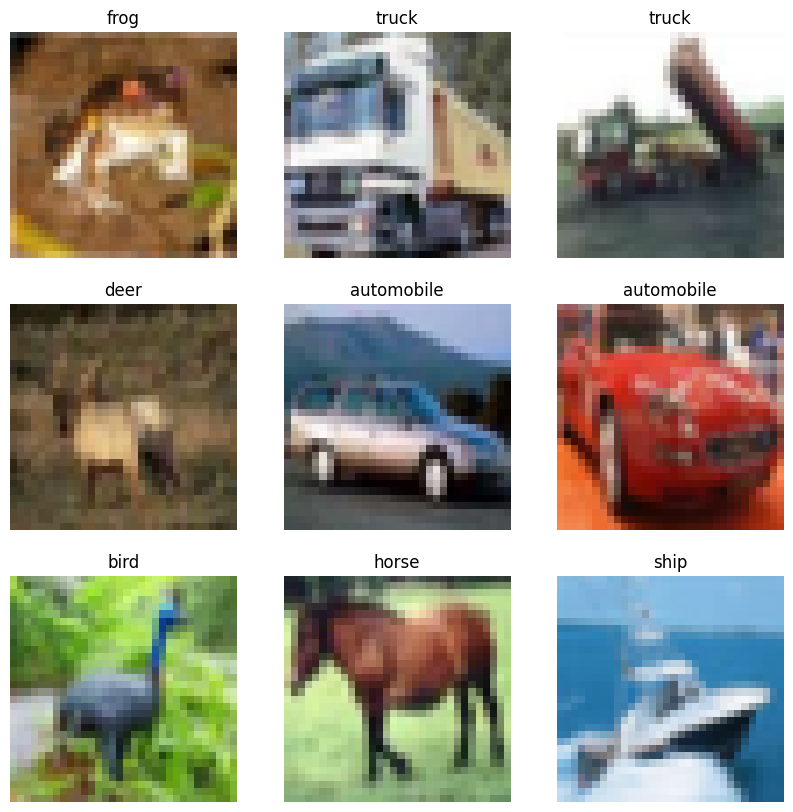

In [2]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 420,842 (1.61 MB)

 Trainable params: 419,818 (1.60 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [4]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 27ms/step - accuracy: 0.3564 - loss: 1.8517 - val_accuracy: 0.5528 - val_loss: 1.3273
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5816 - loss: 1.1761 - val_accuracy: 0.6525 - val_loss: 1.0124
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6564 - loss: 0.9814 - val_accuracy: 0.7075 - val_loss: 0.8556
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.6888 - loss: 0.8902 - val_accuracy: 0.7210 - val_loss: 0.8246
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7169 - loss: 0.8209 - val_accuracy: 0.7406 - val_loss: 0.7586
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7373 - loss: 0.7723 - val_accuracy: 0.7252 - val_loss: 0.8222
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7497 - loss: 0.7369 - val_accuracy: 0.7557 - val_loss: 0.7221
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7513 - loss: 0.72

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.8136 - loss: 0.5626

Test accuracy: 0.8136


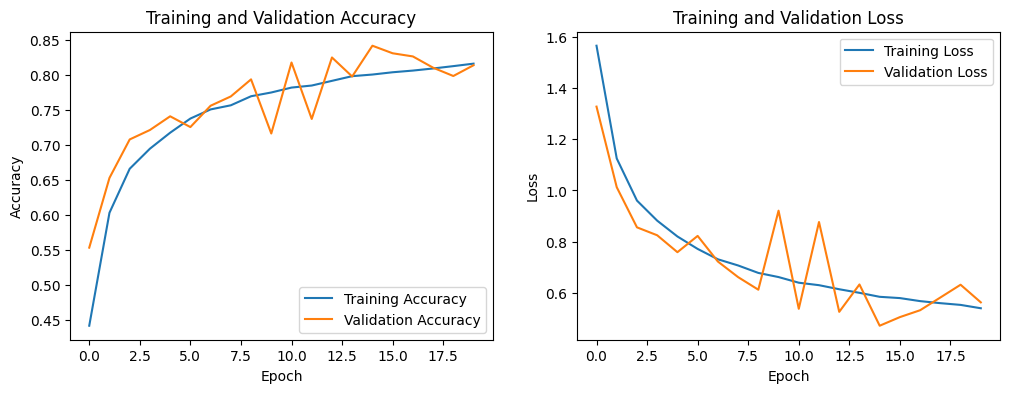

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: ship, True: ship
Image 4: Predicted: ship, True: airplane
Image 5: Predicted: frog, True: frog


In [9]:
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.8136
Test Loss: 0.5626
Final Training Accuracy: 0.8159
Final Validation Accuracy: 0.8136
Final Training Loss: 0.5395
Final Validation Loss: 0.5626
Training Epochs: 20
Model Parameters: 420842


In [11]:
from IPython.display import Markdown, display

display(Markdown("""
## Task 5: Report
本研究針對 CIFAR-10 圖像分類任務設計並訓練了一個卷積神經網路（CNN）模型，達成了 測試準確率 81.36% 的成果。
模型架構以 Keras Sequential API 建構，主要採用三個堆疊的卷積區塊（Block），每個區塊均包含兩層 Conv2D 卷積層搭配 ReLU 啟動函數及 BatchNormalization 層，有助於加速收斂並穩定訓練過程；
每個區塊後方接上 MaxPooling2D 與 Dropout 層，目的在於降維與抑制過擬合。最後透過 Flatten 與全連接層 (Dense) 將特徵輸出為 10 類 softmax 機率分布對應 CIFAR-10 的十個類別。

模型參數總數為 420,842，使用 Adam 優化器（學習率設為 0.001）進行編譯，損失函數採用 sparse_categorical_crossentropy。
此外，為提升泛化能力與增強資料多樣性，本實驗整合 ImageDataGenerator 進行資料增強，包含旋轉、平移與水平翻轉等操作。訓練過程共進行 20 個 epoch，並使用驗證集即時監控模型表現。

從結果來看，最終訓練準確率為 81.59%，驗證準確率亦達 81.36%，顯示模型並無過度擬合現象；最終訓練與驗證損失分別為 0.5395 與 0.5626，數值相近也再次驗證模型穩定性良好。
整體來說，模型架構平衡了效能與複雜度，透過合理的正規化設計（Batch Normalization 與 Dropout）與資料增強技術，使得在未進行特徵工程或遷移學習的情況下，
仍能於 CIFAR-10 達成不錯的分類效果，具備良好延伸性與實作參考價值。

"""))


## Task 5: Report
本研究針對 CIFAR-10 圖像分類任務設計並訓練了一個卷積神經網路（CNN）模型，達成了 測試準確率 81.36% 的成果。
模型架構以 Keras Sequential API 建構，主要採用三個堆疊的卷積區塊（Block），每個區塊均包含兩層 Conv2D 卷積層搭配 ReLU 啟動函數及 BatchNormalization 層，有助於加速收斂並穩定訓練過程；
每個區塊後方接上 MaxPooling2D 與 Dropout 層，目的在於降維與抑制過擬合。最後透過 Flatten 與全連接層 (Dense) 將特徵輸出為 10 類 softmax 機率分布對應 CIFAR-10 的十個類別。

模型參數總數為 420,842，使用 Adam 優化器（學習率設為 0.001）進行編譯，損失函數採用 sparse_categorical_crossentropy。
此外，為提升泛化能力與增強資料多樣性，本實驗整合 ImageDataGenerator 進行資料增強，包含旋轉、平移與水平翻轉等操作。訓練過程共進行 20 個 epoch，並使用驗證集即時監控模型表現。

從結果來看，最終訓練準確率為 81.59%，驗證準確率亦達 81.36%，顯示模型並無過度擬合現象；最終訓練與驗證損失分別為 0.5395 與 0.5626，數值相近也再次驗證模型穩定性良好。
整體來說，模型架構平衡了效能與複雜度，透過合理的正規化設計（Batch Normalization 與 Dropout）與資料增強技術，使得在未進行特徵工程或遷移學習的情況下，
仍能於 CIFAR-10 達成不錯的分類效果，具備良好延伸性與實作參考價值。



"Conclusion"

---


##"Task 5:" Report

---
本研究針對 CIFAR-10 圖像分類任務設計並訓練了一個卷積神經網路（CNN）模型，達成了 測試準確率 81.36% 的成果。
模型架構以 Keras Sequential API 建構，主要採用三個堆疊的卷積區塊（Block），每個區塊均包含兩層 Conv2D 卷積層搭配 ReLU 啟動函數及 BatchNormalization 層，有助於加速收斂並穩定訓練過程；
每個區塊後方接上 MaxPooling2D 與 Dropout 層，目的在於降維與抑制過擬合。最後透過 Flatten 與全連接層 (Dense) 將特徵輸出為 10 類 softmax 機率分布對應 CIFAR-10 的十個類別。

模型參數總數為 420,842，使用 Adam 優化器（學習率設為 0.001）進行編譯，損失函數採用 sparse_categorical_crossentropy。
此外，為提升泛化能力與增強資料多樣性，本實驗整合 ImageDataGenerator 進行資料增強，包含旋轉、平移與水平翻轉等操作。訓練過程共進行 20 個 epoch，並使用驗證集即時監控模型表現。

從結果來看，最終訓練準確率為 81.59%，驗證準確率亦達 81.36%，顯示模型並無過度擬合現象；最終訓練與驗證損失分別為 0.5395 與 0.5626，數值相近也再次驗證模型穩定性良好。
整體來說，模型架構平衡了效能與複雜度，透過合理的正規化設計（Batch Normalization 與 Dropout）與資料增強技術，使得在未進行特徵工程或遷移學習的情況下，
仍能於 CIFAR-10 達成不錯的分類效果，具備良好延伸性與實作參考價值。